In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
g = nx.karate_club_graph()

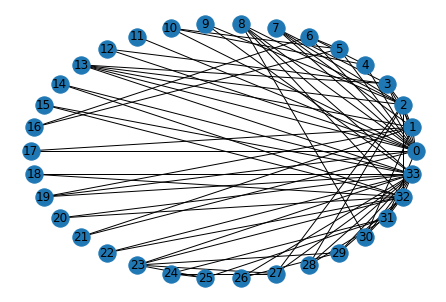

In [3]:
nx.draw_circular(g, with_labels=True)
plt.show()

In [4]:
A = nx.to_numpy_array(g)
D = np.diag(A.sum(axis=1))
L = D - A

In [5]:
L

array([[16., -1., -1., ..., -1.,  0.,  0.],
       [-1.,  9., -1., ...,  0.,  0.,  0.],
       [-1., -1., 10., ...,  0., -1.,  0.],
       ...,
       [-1.,  0.,  0., ...,  6., -1., -1.],
       [ 0.,  0., -1., ..., -1., 12., -1.],
       [ 0.,  0.,  0., ..., -1., -1., 17.]])

In [6]:
# Get eigen-values (l) and -vectors (x)
l, x = np.linalg.eig(L)

In [7]:
l.shape, x.shape

((34,), (34, 34))

In [8]:
# sort by eigenvalue
idx = np.argsort(l)
l = l[idx]
x = x[:,idx]

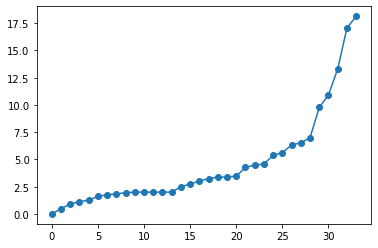

In [9]:
_ = plt.plot(l, marker='o')

The smallest eigen-value is zero.  Let's carry out the matrix multiplication

In [10]:
L @ x[:,0]

array([ 4.44089210e-16,  1.77635684e-15,  1.11022302e-15, -4.44089210e-15,
       -3.33066907e-16, -1.99840144e-15, -5.27355937e-16,  7.77156117e-16,
        5.55111512e-16,  8.32667268e-17,  2.49800181e-16,  5.55111512e-17,
        5.27355937e-16,  1.47104551e-15,  2.22044605e-16,  1.11022302e-16,
        5.55111512e-17, -1.94289029e-16,  1.11022302e-16,  1.05471187e-15,
        1.11022302e-16,  1.38777878e-16,  1.11022302e-16, -7.21644966e-16,
       -1.22124533e-15,  1.41553436e-15,  4.44089210e-16,  2.49800181e-16,
        9.15933995e-16,  1.33226763e-15,  0.00000000e+00, -1.11022302e-15,
        6.66133815e-16, -4.44089210e-15])

Why is this happening?

In [51]:
L

array([[16., -1., -1., ..., -1.,  0.,  0.],
       [-1.,  9., -1., ...,  0.,  0.,  0.],
       [-1., -1., 10., ...,  0., -1.,  0.],
       ...,
       [-1.,  0.,  0., ...,  6., -1., -1.],
       [ 0.,  0., -1., ..., -1., 12., -1.],
       [ 0.,  0.,  0., ..., -1., -1., 17.]])

In [59]:
x[:,0]

array([-0.17149859, -0.17149859, -0.17149859, -0.17149859, -0.17149859,
       -0.17149859, -0.17149859, -0.17149859, -0.17149859, -0.17149859,
       -0.17149859, -0.17149859, -0.17149859, -0.17149859, -0.17149859,
       -0.17149859, -0.17149859, -0.17149859, -0.17149859, -0.17149859,
       -0.17149859, -0.17149859, -0.17149859, -0.17149859, -0.17149859,
       -0.17149859, -0.17149859, -0.17149859, -0.17149859, -0.17149859,
       -0.17149859, -0.17149859, -0.17149859, -0.17149859])

The eigen-vector is 1/sqrt(N).  Recall that L has the property that all rows sum to 0 because it's defined as having the degree of the node in the diagonal and each connected element represented by a -1.  Therefore mat-multiplying by a vector of 1s will act to sum the rows.

In [18]:
labels = np.array([(g.nodes[i]['club']!='Mr. Hi')*1 for i in range(A.shape[0])])

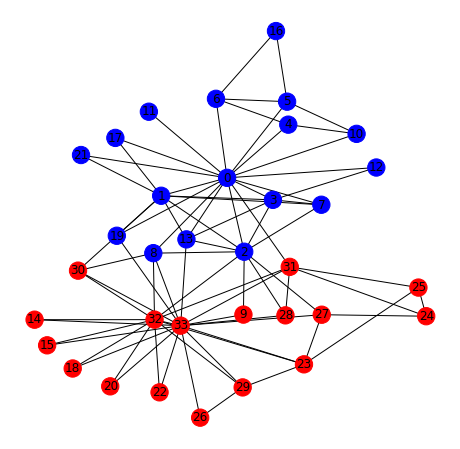

In [19]:
fig, ax = plt.subplots(figsize=(8,8))
nx.draw_kamada_kawai(g, with_labels=True, node_color=labels, cmap='bwr', ax=ax)

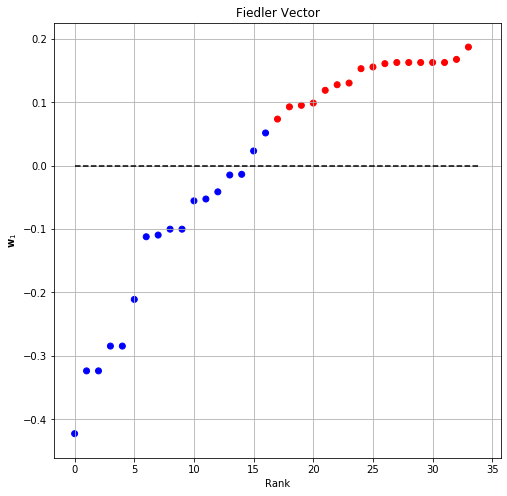

In [20]:
# Plot against 2nd and 3rd eigenvectors (1st is constant) and color-code by true label
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x=range(x.shape[1]), y=x[np.argsort(x[:,1]),1], c=labels[np.argsort(x[:,1])], cmap='bwr')
ax.grid()
ax.hlines(0, 0, 34, linestyle='--', color='black')
_ = ax.set(xlabel='Rank', ylabel='$\mathbf{w}_1$', title='Fiedler Vector')

In [21]:
# Assign a cluster identity based on sign of Fiedler vector
c = (x[:,1]>0)*1

In [22]:
c

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [27]:
np.where(c!=labels)[0]

array([2, 8])

In [29]:
# Accuracy
(c==labels).mean()

0.9411764705882353

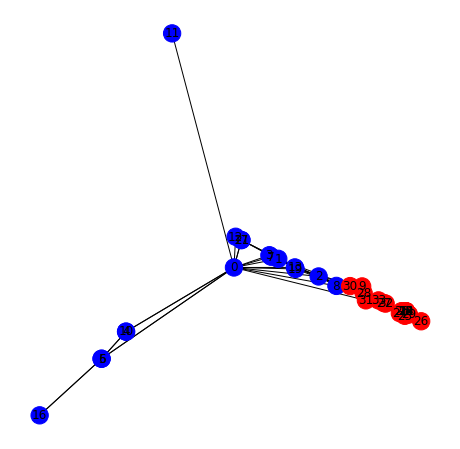

In [42]:
# Plot against 2nd and 3rd eigenvectors (1st is constant) and color-code by true label
pos_eigen = {i: x[i,1:3] for i in range(x.shape[0])}
fig, ax = plt.subplots(figsize=(8,8))
nx.draw(g, pos=pos_eigen, with_labels=True, node_color=labels, cmap='bwr', ax=ax)

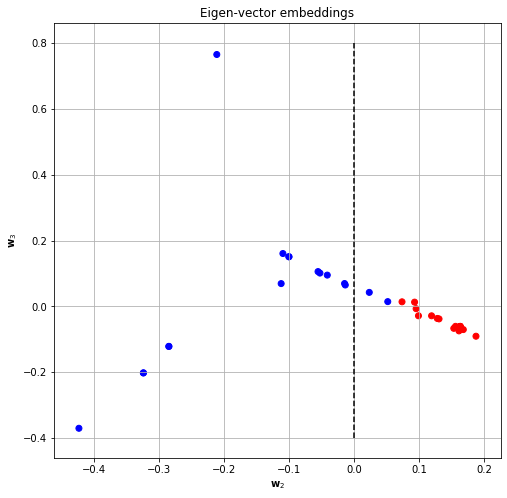

In [30]:
# Plot against 2nd and 3rd eigenvectors (1st is constant) and color-code by true label
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x=x[:,1], y=x[:,2], c=labels, cmap='bwr')
ax.grid()
ax.vlines(0, -0.4, 0.8, linestyle='--', color='black')
_ = ax.set(xlabel='$\mathbf{w}_2$', ylabel='$\mathbf{w}_3$', title='Eigen-vector embeddings')

## Disconnected components

In [212]:
n1, n2, n3 = 5, 7, 4
g1 = nx.random_graphs.barabasi_albert_graph(n1, 2, seed=0)
nx.set_node_attributes(g1, 0, "cluster")
g2 = nx.random_graphs.barabasi_albert_graph(n2, 3, seed=1)
nx.set_node_attributes(g2, 0.5, "cluster")
g3 = nx.random_graphs.barabasi_albert_graph(n3, 2, seed=2)
nx.set_node_attributes(g3, 1.0, "cluster")
#cs = np.zeros(n1+n2+n3)
#cs[n1:n2] = 0.5
#cs[n2:] = 1

In [213]:
F = nx.disjoint_union(g1, g2)
F = nx.disjoint_union(F, g3)

In [283]:
# Use this as the ground truth cluster identity, which we'll use for coloring
cs = np.array(list(nx.get_node_attributes(F, "cluster").values()))

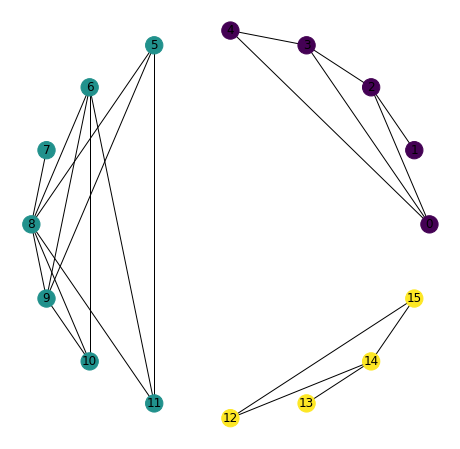

In [284]:
fig, ax = plt.subplots(figsize=(8,8))
nx.draw_circular(F, with_labels=True, ax=ax, cmap='viridis', node_color=cs)

In [285]:
A_f = nx.to_numpy_array(F)
D_f = np.diag(A_f.sum(axis=1))
L_f = D_f - A_f

In [286]:
L_f

array([[ 3.,  0., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [-1., -1.,  3., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [-1.,  0., -1.,  3., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [-1.,  0.,  0., -1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  3.,  0.,  0., -1., -1.,  0., -1.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  4.,  0., -1., -1., -1., -1.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1., -1., -1.,  6., -1., -1., -1.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1., -1.,  0., -1.,  4., -1.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0

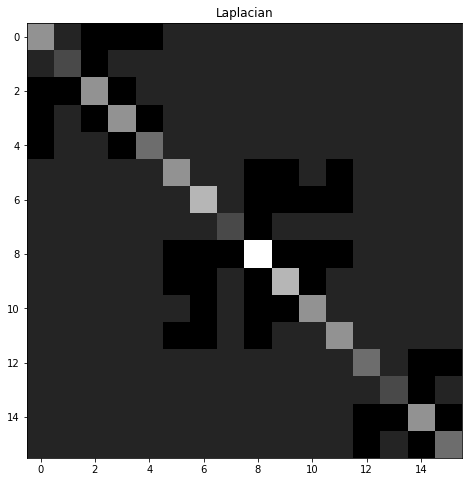

In [225]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(L_f, cmap='gray')
_ = ax.set(title='Laplacian')

In [226]:
# Get a permutation matrix to randomly shuffle the node ordering
shuffle_idx = np.random.choice(range(L_f.shape[0]), L_f.shape[0], replace=False)

P = np.zeros(L_f.shape)
for i in range(P.shape[0]):
    P[i,shuffle_idx[i]] = 1

In [227]:
A_f_mod = P @ A_f @ P.T
D_f_mod = np.diag(A_f_mod.sum(axis=1))
L_f_mod = D_f_mod - A_f_mod

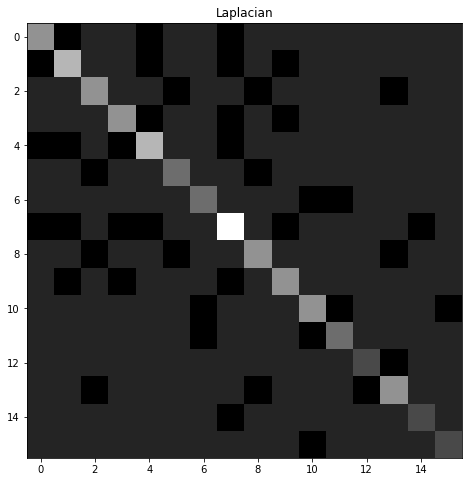

In [228]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(L_f_mod, cmap='gray')
_ = ax.set(title='Laplacian')

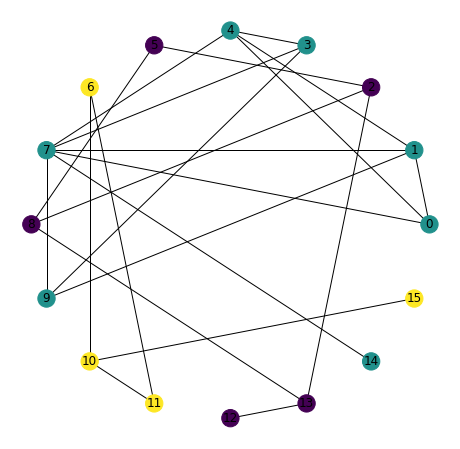

In [230]:
# Shuffle the colors as well to maintain
fig, ax = plt.subplots(figsize=(8,8))
nx.draw_circular(nx.from_numpy_array(A_f_mod), with_labels=True, node_color=P@cs, ax=ax, cmap='viridis')

In [262]:
# Get eigen-values (l) and -vectors (x)
l_f_mod, x_f_mod = np.linalg.eig(L_f_mod)

# sort by eigenvalue
idx_f_mod = np.argsort(l_f_mod)
l_f_mod = l_f_mod[idx_f_mod].round(8)
x_f_mod = x_f_mod[:,idx_f_mod].round(8)

In [263]:
# How many eigenvalues =~ 0?
(l_f_mod < 1e-8).sum()

3

In [278]:
# Note that there are 3 unique values in the first vector
unique_vals = np.unique(x_f_mod[:,0])
unique_vals

array([0.00833523, 0.04584689, 0.44522038])

In [279]:
# Each unique value is an indicator for the node positions 
# Get the node ids that have the first unique value
ind_0 = np.where(x_f_mod[:,0]==unique_vals[0])[0]
ind_0

array([ 0,  1,  3,  4,  7,  9, 14])

In [269]:
# Get the original cluster identities for these nodes and observe they're all the same
(P@cs)[ind_0]

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [280]:
# Repeat for next unique value
ind_1 = np.where(x_f_mod[:,0]==unique_vals[1])[0]
ind_1

array([ 6, 10, 11, 15])

In [271]:
(P@cs)[ind_1]

array([1., 1., 1., 1.])

In [281]:
# And for 3rd 
ind_2 = np.where(x_f_mod[:,0]==unique_vals[2])[0]
ind_2

array([ 2,  5,  8, 12, 13])

In [282]:
(P@cs)[ind_2]

array([0., 0., 0., 0., 0.])